<a href="https://colab.research.google.com/github/Ariq154404/IM-Project-2/blob/main/Jigsaw_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here the output of the Bert model is being fine tuned using help of feed forward nwural network**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Total feature is being loaded are being loaded

In [ ]:
tot_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/small_train.csv')

In [ ]:
tot_train.shape

(90000, 4)

In [ ]:
tot_train.head()

,Unnamed: 0,index,comment_text,target
0,0,846242,"Sorry China,we have a more important deal we n...",0.000000
1,1,896179,I've dealt with this ER and Dr. on two differe...,0.000000
2,2,1305007,Your belief in a vengeful sky daddy doesn't tr...,0.166667
3,3,1153675,"Ah those Russians, have to give em credit for ...",0.400000
4,4,934343,"""His handles were not elected , there is only ...",0.400000


In [ ]:
y=tot_train.pop('target')

In [ ]:
y.head()

0    0.000000
1    0.000000
2    0.166667
3    0.400000
4    0.400000
Name: target, dtype: float64

In [ ]:
y.describe()

count    90000.000000
mean         0.102637
std          0.196530
min          0.000000
25%          0.000000
50%          0.000000
75%          0.166667
max          1.000000
Name: target, dtype: float64

In [ ]:
y=y.values

Y values are being encoded to binary based on threshold of 0.5

In [ ]:
for i in range(len(y)):
  if y[i]>0.5:
    y[i]=1.0
  else:
    y[i]=0


In [ ]:
del tot_train

In [ ]:
from numpy import load
# load array
tot_feature = load('/content/drive/MyDrive/Colab Notebooks/tot_feature.npy',allow_pickle=True)

In [ ]:
train_fea=tot_feature[:90000]

In [ ]:
test_fea=tot_feature[90000:]

In [ ]:
train_fea.shape

(90000, 768)

In [ ]:
test_fea.shape

(97320, 768)

In [ ]:
from numpy import save
save('/content/drive/MyDrive/Colab Notebooks/train_feature.npy', train_fea)
save('/content/drive/MyDrive/Colab Notebooks/test_feature.npy', test_fea)

In [ ]:
import json
import os
import pandas as pd
import pprint
import tensorflow as tf
import time
import numpy as np
from tensorflow import keras

**Tpu is being used to fine train neural network so the the cluster strateg is being set**

In [ ]:
print(tf.__version__)
import distutils
if distutils.version.LooseVersion(tf.__version__) < '1.14':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/classification_iris_data_with_keras.ipynb')

2.5.0


In [ ]:
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

In [ ]:
tpu_address = TF_MASTER

In [ ]:
y.shape

(90000,)

Unbalanced target exists so train test slipt is done and saved

In [ ]:
x_train, x_valid, y_train, y_valid = \
    train_test_split(train_fea, y, stratify=y, train_size=0.75)

In [ ]:
save('/content/drive/MyDrive/Colab Notebooks/x_train.npy', x_train)
save('/content/drive/MyDrive/Colab Notebooks/y_train.npy', y_train)
save('/content/drive/MyDrive/Colab Notebooks/x_valid.npy', x_valid)
save('/content/drive/MyDrive/Colab Notebooks/y_valid.npy', y_valid)

Head of neural network is being defined

In [ ]:
from tensorflow.keras import layers
def get_model(input_shape):
  return  keras.Sequential([layers.BatchNormalization(input_shape=input_shape),
                         layers.Dense(256,activation='relu'),
                         layers.BatchNormalization(),
                         layers.Dropout(0.3),
                         layers.Dense(64,activation='relu'),
                         layers.BatchNormalization(),
                          layers.Dropout(0.3),
                          layers.Dense(1,activation="sigmoid")
                         ]
  )

Tpu stategy is being defined

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.35.216.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.35.216.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
input_shape = [x_train.shape[1]]

In [ ]:
with strategy.scope():
  model = get_model(input_shape)
  model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC'])
  early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,)
  lr_schedule = keras.callbacks.ReduceLROnPlateau(
    patience=0,
    factor=0.2,
    min_lr=0.001,)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 768)               3072      
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
132/132 [==============================] - 5s 33ms/step - loss: 0.1391 - auc: 0.9116 - val_loss: 0.1502 - val_auc: 0.8913
Epoch 2/200
132/132 [==============================] - 2s 18ms/step - loss: 0.1340 - auc: 0.9183 - val_loss: 0.1509 - val_auc: 0.8913
Epoch 3/200
132/132 [==============================] - 2s 17ms/step - loss: 0.1312 - auc: 0.9226 - val_loss: 0.1512 - val_auc: 0.8900
Epoch 4/200
132/132 [==============================] - 2s 17ms/step - loss: 0.1288 - auc: 0.9260 - val_loss: 0.1522 - val_auc: 0.8875
Epoch 5/200
132/132 [==============================] - 2s 17ms/step - loss: 0.1260 - auc: 0.9309 - val_loss: 0.1519 - val_auc: 0.8898
Epoch 6/200
132/132 [==============================] - 2s 17ms/step - loss: 0.1237 - auc: 0.9340 - val_loss: 0.1547 - val_auc: 0.8872


Output model is being saved

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/baseline_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/baseline_model.h5")

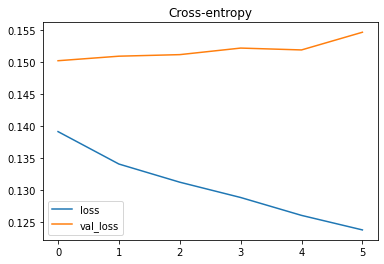

In [ ]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
z=history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")